Top Protein Ingredients :

0 SOY PROTEIN ISOLATE
1 SOY PROT ISOLATE,K TYPE
2 GELATINS,DRY PDR,UNSWTND
3 EGG,WHITE,DRIED,STABILIZED,GLUCOSE RED
4 SEAL,BEARDED (OOGRUK),MEAT,DRIED (ALASKA NATIVE)
5 EGG,WHITE,DRIED,PDR,STABILIZED,GLUCOSE RED
6 EGG,WHITE,DRIED
7 BEVERAGES,PROT PDR WHEY BSD
8 STEELHEAD TROUT,DRIED,FLESH (SHOSHONE BANNOCK)
9 EGG,WHITE,DRIED,FLAKES,STABILIZED,GLUCOSE RED


Top Sodium ingredients  :

0 SALT,TABLE
1 LEAVENING AGENTS,BAKING SODA
2 DESSERTS,RENNIN,TABLETS,UNSWTND
3 SOUP,BF BROTH OR BOUILLON,PDR,DRY
4 SOUP,BEEF BROTH,CUBED,DRY
5 SOUP,CHICK BROTH CUBES,DRY
6 SOUP,CHICK BROTH OR BOUILLON,DRY
7 SEASONING MIX,DRY,SAZON,CORIANDER & ANNATTO
8 GRAVY,AU JUS,DRY
9 LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,NA AL SULFATE
col3 Energ_Kcal
col4 Water_(g)

Scatter plots : 


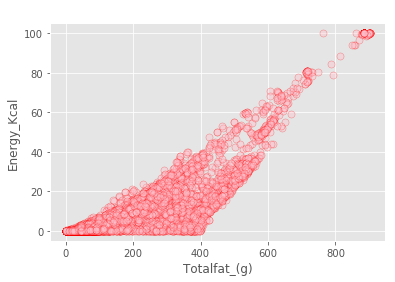

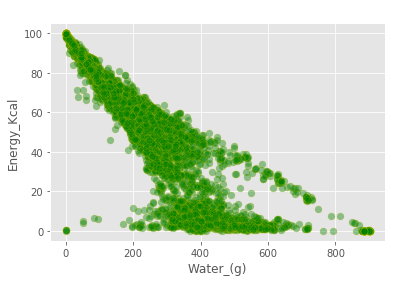

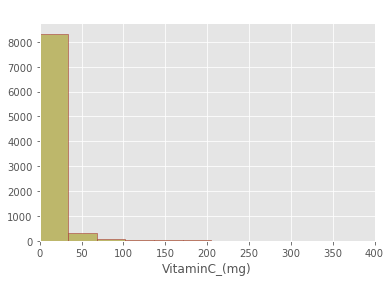

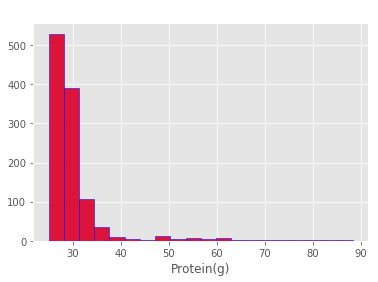

In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def stats_USDA(df):
            corr = df.corr()
            #print(corr)
            m,n=corr.shape
            negcorrel=[]
            for i in range(m):
                  for j in range(n):
                            if corr.iloc[i,j] < -0.8 and corr.iloc[i,j] != -1:
                                                    negcorrel.append((j,i))
            poscorrel = []
            for i in range(m):
                      for j in range(n):
                            if corr.iloc[i,j] > 0.8 and corr.iloc[i,j] != 1:
                                                poscorrel.append((j,i))    
            neg_correl_columns= []
            for i in negcorrel:          
                     neg_correl_columns.append((corr.columns[i[0]],corr.columns[i[1]]))
            pos_correl_columns = []
            for i in poscorrel:
                     pos_correl_columns.append((corr.columns[i[0]],corr.columns[i[1]]))
            return  [ i for i in pos_correl_columns ] , [j for j in neg_correl_columns]

def top_protein_resource(df):
            top_protein_sources = df [df['Protein_(g)'] > 25 ]
            mylist = [i for i in top_protein_sources['Protein_(g)']]
            top_protein_sources.sort_values(by='Protein_(g)',ascending=False)
            top_10_protein_sources = top_protein_sources.nlargest(10,'Protein_(g)')
            unique_desc = list(top_10_protein_sources['Shrt_Desc'])
            return mylist,unique_desc
        
def top_sodium_resource(df):
            high_sodium = df[df['Sodium_(mg)'] > 5000]
            high_sodium.sort_values(by='Sodium_(mg)',ascending=False)
            top_10_Sodium = high_sodium.nlargest(10,'Sodium_(mg)')
            top_sodium = list(top_10_Sodium['Shrt_Desc'])
            return top_sodium

def VitaminC(df):
            list1 = list(df['Vit_C_(mg)'])
            import math
            mylist = [0 if math.isnan(x) else x for x in list1]
            return mylist
        
def main_USDA():
            df = pd.read_excel("C:\\Software\\Data\\MS-2017-2019\\SPRING-2018\\NWSC\\Project\\Project-Datasets\\ABBREV.xlsx")
            stats_df = df.describe()
            stats_df.to_excel("USDA-Stats.xlsx")
            pos_correl,neg_correl = stats_USDA(df)
            #print("Positive Correl",pos_correl_columns)
            #print("Negative Correl",neg_correl_columns)
            protein_list,top_protein_ingredients = top_protein_resource(df)
            print("Top Protein Ingredients :\n")
            for i in top_protein_ingredients:
                   print(top_protein_ingredients.index(i),i)
            print("")
            print("")
            print("Top Sodium ingredients  :\n")
            top_sodium = top_sodium_resource(df)
            mylist = VitaminC(df)
            for i in range(len(top_sodium)):
                     print(i,top_sodium[i])
            pos_col = pos_correl[0]
            neg_col = neg_correl[0]
            col1,col2 = pos_col
            col3,col4 = neg_col
            print('col3',col3)
            print('col4',col4)
            print("")
            print("Scatter plots : ")
            plt.style.use('ggplot')
            fig1 = plt.figure()
            #axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
            #axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
            sp1 = fig1.add_subplot(1, 1, 1)
            sp1.scatter(list(df[col2]),list(df[col1]),color='pink',alpha=0.4,edgecolors='r',s=50)
            sp1.set_xlabel('Totalfat_(g)')
            sp1.set_ylabel('Energy_Kcal')
            sp1.set_title(' Fat vs Energy_Kcal')  
            fig2 = plt.figure()
            sp2 = fig2.add_subplot(1,1,1)
            sp2.scatter(list(df[col3]),list(df[col4]),color='g',alpha=0.4,edgecolors='y',s=50)
            sp2.set_xlabel('Water_(g)')
            sp2.set_ylabel('Energy_Kcal')
            sp2.set_title(' Water vs Energy_Kcal')
            fig3 = plt.figure()
            sp3 = fig3.add_subplot(1, 1, 1)
            sp3.hist(mylist,bins=80,color='darkkhaki',edgecolor='brown')
            sp3.set_xlabel('VitaminC_(mg)')
            sp3.set_title('VitaminC_(mg) distribution')
            sp3.set_xlim(0,400)
            fig4 = plt.figure()
            sp4 = fig4.add_subplot(1, 1, 1)
            sp4.hist(protein_list,bins=20,color='crimson',edgecolor='b')
            sp4.set_xlabel('Protein(g)')
            sp4.set_title('Protein distribution')
            #sp4.set_xlim(0,400)
main_USDA()